In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [20]:
from sklearn import cross_validation, datasets, metrics, neighbors

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# 1. Метод k ближайших соседей

In [66]:
m_size = 200

# Генерация данных
classification_problem = datasets.make_classification(n_samples=m_size, n_features=2, \
                                                      n_informative=2, n_classes=4, \
                                                      n_redundant=0, n_clusters_per_class=1, \
                                                      random_state=3)

In [67]:
colors = ListedColormap(['red', 'blue', 'yellow', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow', 'lightgreen'])

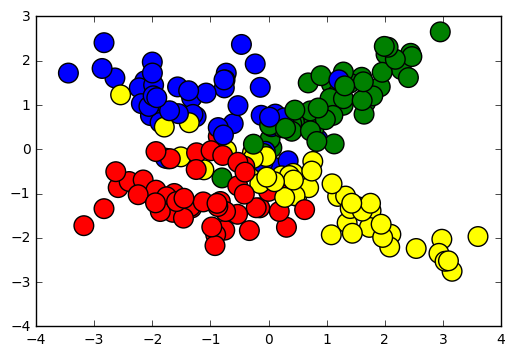

In [68]:
plt.figure()
plt.scatter(map(lambda x: x[0], classification_problem[0]), \
            map(lambda x: x[1], classification_problem[0]), \
            c=classification_problem[1], cmap=colors, s=m_size)
plt.show()

In [69]:
train_data, test_data, train_labels, test_labels = \
            cross_validation.train_test_split(classification_problem[0], \
                                              classification_problem[1], test_size = 0.3, \
                                              random_state = 1)

In [70]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), \
                                                        yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(\
                       metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(\
                        metrics.accuracy_score(test_labels, estimator.predict(test_data))))

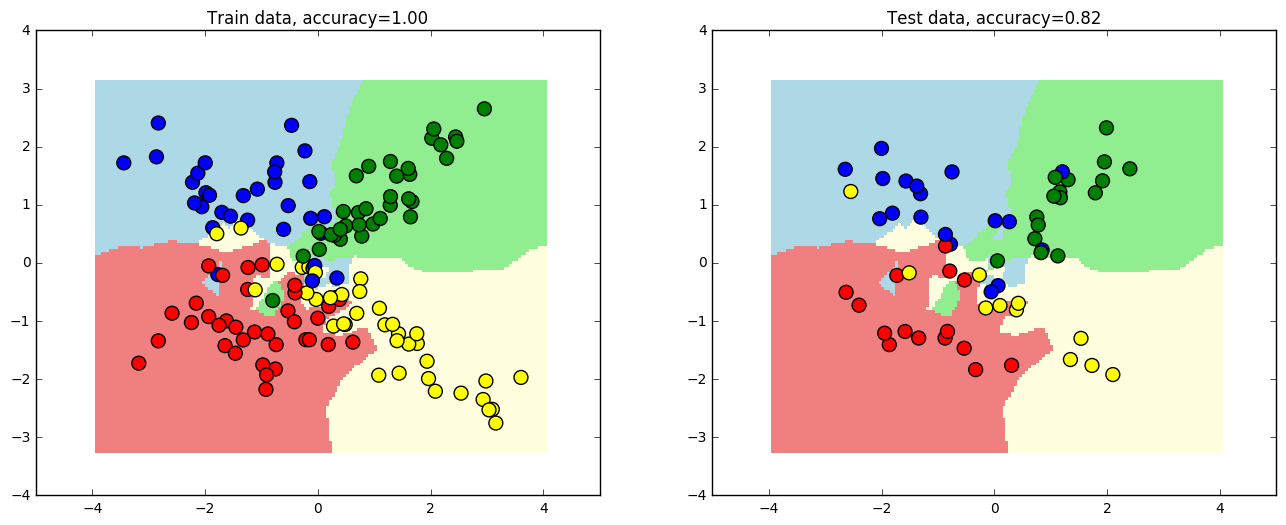

In [71]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=1)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

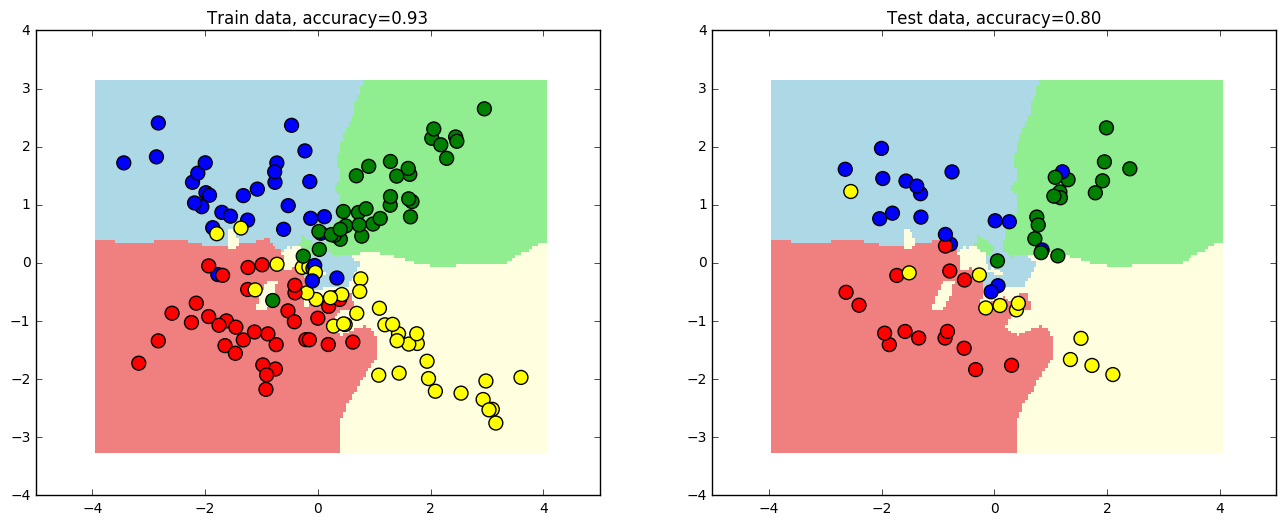

In [72]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=2)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

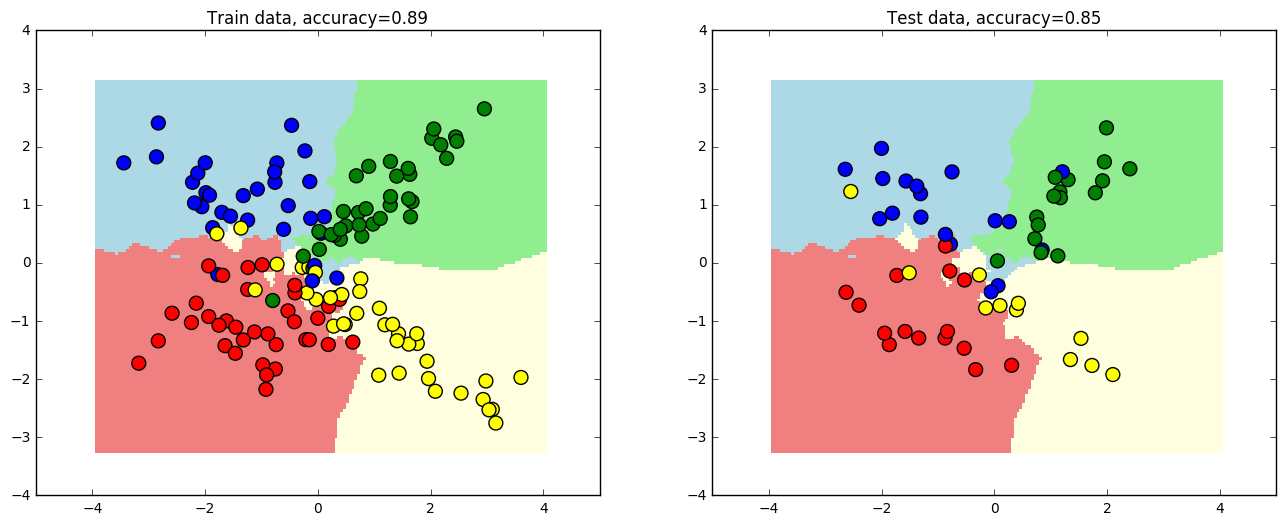

In [73]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=3)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

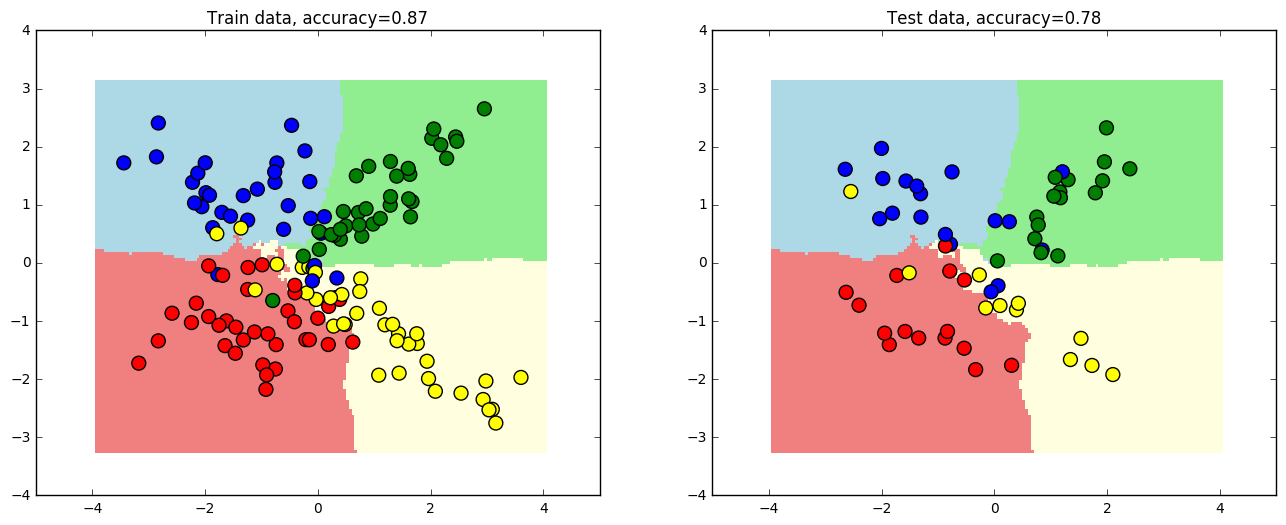

In [74]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=10)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

# KFold

In [75]:
from sklearn.model_selection import cross_val_score

mean_scores = []
ks = []

for k in range(1,20):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(clf, classification_problem[0], classification_problem[1], cv=5)
    mean_scores.append(scores.mean())
    ks.append(k)

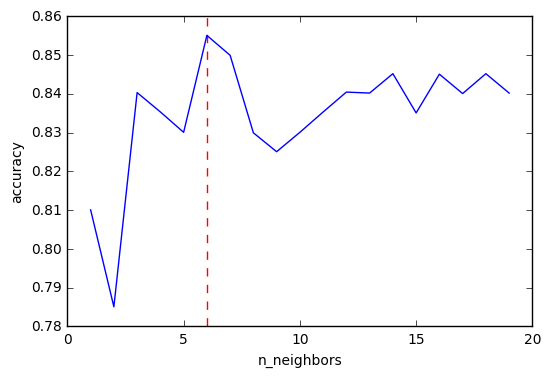

Максимум при n_neighbors = 6


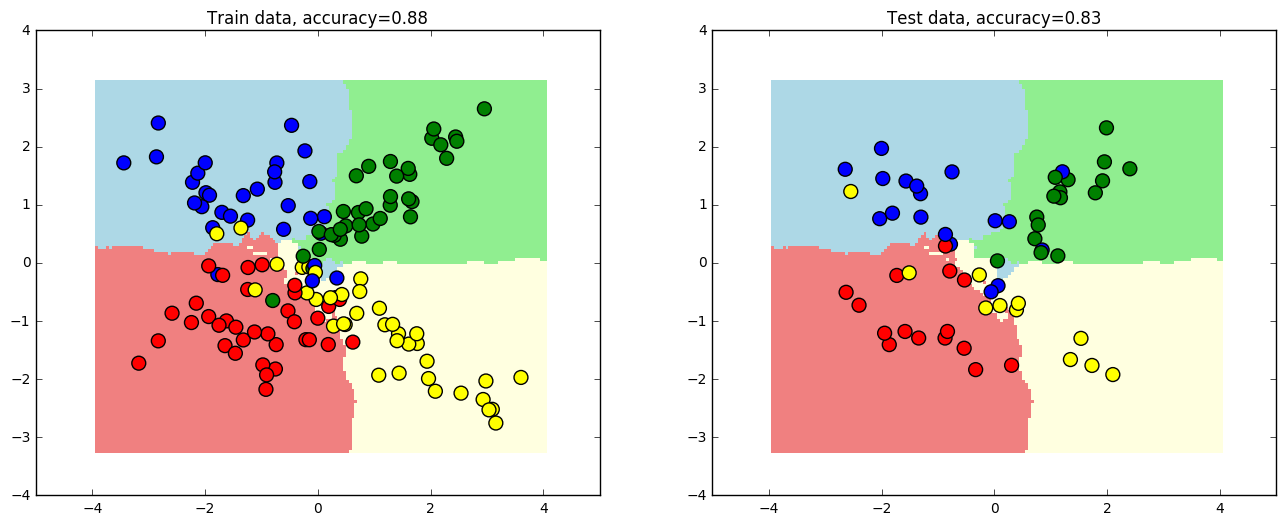

In [78]:
plt.figure()

best_k = ks[np.argmax(mean_scores)]

plt.axvline(best_k, c='r', linestyle='--')
plt.plot(ks, mean_scores)
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.show()

print('Максимум при n_neighbors = {}'.format(ks[np.argmax(mean_scores)]))

estimator = neighbors.KNeighborsClassifier(n_neighbors=best_k)
plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

# 2. Наивный байесовский классификатор

In [37]:
from sklearn.datasets import load_digits, load_breast_cancer

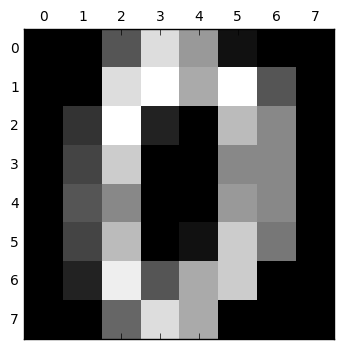

In [72]:
digits = load_digits()
breast_cancer = load_breast_cancer()

plt.figure()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [99]:
digits.data[:2]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.]])

In [103]:
digits.target[:2]

array([0, 1])

In [104]:
breast_cancer.data[:2]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

In [113]:
breast_cancer.target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [114]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

clfs = [(BernoulliNB(), 'BernoulliNB'), (MultinomialNB(), 'MultinomialNB'), \
        (GaussianNB(), 'GaussianNB')]

In [121]:
def cmp_clfs(ds, ds_name, cv=3, clfs=clfs):
    """
    ds : dataset
    ds_name : name of the dataset
    clfs : classifiers
    """
    for clf in clfs:
        scores = cross_val_score(clf[0], ds.data, ds.target, cv=cv)
        mean_score = scores.mean()
        print("for dataset *{}* accuracy is {:.4f} ({})".format(ds_name, mean_score, clf[1]))

In [122]:
cmp_clfs(digits, 'digits')

for dataset *digits* accuracy is 0.8258 (BernoulliNB)
for dataset *digits* accuracy is 0.8709 (MultinomialNB)
for dataset *digits* accuracy is 0.8186 (GaussianNB)


In [123]:
cmp_clfs(breast_cancer, 'breast_cancer')

for dataset *breast_cancer* accuracy is 0.6274 (BernoulliNB)
for dataset *breast_cancer* accuracy is 0.8946 (MultinomialNB)
for dataset *breast_cancer* accuracy is 0.9367 (GaussianNB)


## Вопросы:

1. Каким получилось максимальное качество классификации на датасете breast_cancer?

2. Каким получилось максимальное качество классификации на датасете digits?

3. Какие утверждения из приведенных ниже верны?

(a) На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли

(b) На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением

(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков

(d) На вещественных признаках лучше всего сработало нормальное распределение

## Ответы:

1. 0.9367
2. 0.8709
3. (c) - на датасете digits, и (d) - на датасете breast_cancer